In [100]:
# Import Python packages
import math
import sympy as sm
from sympy import *
import numpy as np
from numpy import *
from fractions import Fraction
import matplotlib.pyplot as plt

Generates random data as $n_{xxxx}, n_{xxxy}, n_{xxyx}, n_{xyxx}, n_{xxyy}, n_{xyxy}, n_{xyyx}, n_{xyyy}$
---------------------

NOTATION: $n_{xxxx}$ is the number of observations taking the values (+1, +1, +1, +1) or (-1, -1, -1, -1), and similarly for the remaining notations.  
Feel free to modify $\theta_{2}$ and $\theta_{3}$ to observe the corresponding changes in the plots

In [101]:
h1_range = np.linspace(0, 1, num=50)  # 0 <= θ1 <= 1
K = 10000 # repetition
data = np.zeros((50,K,8)) # Makes a 50 by K by 8 array to hold random data

for i in range(50):
    h1 = h1_range[i]  # θ1
    h2 = 0.5          # θ2
    h3 = 0.5          # θ3
    
    # Computes the site pattern probabilities
    p_xxxx = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxxy = 1/8 * (1 + h1*h2 + h1*h3 + h2*h3)
    p_xxyx = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxx = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xxyy = 1/8 * (1 + h1*h2 - h1*h3 - h2*h3)
    p_xyxy = 1/8 * (1 - h1*h2 + h1*h3 - h2*h3)
    p_xyyx = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)
    p_xyyy = 1/8 * (1 - h1*h2 - h1*h3 + h2*h3)

    # Generates samples from the multinomial distribution
    # 10000 trials, size = K
    data[i] = np.random.multinomial(10000, [p_xxxx]*1 + [p_xxxy]*1 + [p_xxyx]*1 + [p_xyxx]*1 + [p_xxyy]*1 + [p_xyxy]*1 + [p_xyyx]*1 + [p_xyyy]*1, size=K)
print(data)

[[[1588. 1623.  953. ...  878. 1542. 1514.]
  [1592. 1591.  929. ...  890. 1598. 1567.]
  [1578. 1646.  953. ...  908. 1558. 1507.]
  ...
  [1589. 1570.  893. ...  950. 1488. 1560.]
  [1526. 1571.  944. ...  941. 1583. 1569.]
  [1492. 1565.  882. ...  956. 1537. 1588.]]

 [[1573. 1597.  948. ...  947. 1543. 1517.]
  [1595. 1612.  914. ...  958. 1503. 1565.]
  [1557. 1557.  997. ...  904. 1540. 1584.]
  ...
  [1603. 1570.  936. ...  941. 1501. 1586.]
  [1566. 1610.  908. ...  947. 1532. 1558.]
  [1556. 1517.  930. ...  975. 1533. 1638.]]

 [[1638. 1556.  939. ...  929. 1543. 1466.]
  [1582. 1591.  966. ...  939. 1568. 1524.]
  [1646. 1608.  930. ...  958. 1533. 1470.]
  ...
  [1562. 1630.  895. ...  940. 1563. 1535.]
  [1634. 1639.  913. ...  944. 1490. 1452.]
  [1606. 1669.  938. ...  949. 1439. 1520.]]

 ...

 [[2873. 2664.  945. ...  956.  339.  353.]
  [2740. 2751. 1009. ...  937.  347.  342.]
  [2799. 2686.  931. ...  980.  354.  395.]
  ...
  [2734. 2693.  934. ...  935.  384.  38

Finds $θ$ and $δ$ that achieves the maximum likelihood
---------------------

In [102]:
# Reference: https://en.wikipedia.org/wiki/Newton%27s_method
def newtons_method(
    x0,               # The initial guess
    f,                # The function whose root we are trying to find
    f_prime,          # The derivative of the function
    tolerance,        # 7-digit accuracy is desired
    epsilon,          # Do not divide by a number smaller than this
    max_iterations,   # The maximum number of iterations to execute
    ):
    for i in range(max_iterations):
        y = f(x0)
        yprime = f_prime(x0)

        if abs(yprime) < epsilon:       # Stop if the denominator is too small
            break

        x1 = x0 - y / yprime            # Do Newton's computation

        if abs(x1 - x0) <= tolerance:   # Stop when the result is within the desired tolerance
            return x1                   # x1 is a solution within tolerance and maximum number of iterations

        x0 = x1                         # Update x0 to start the process again

    return None                         # Newton's method did not converge


In [103]:
# Defines notations to simplify expression for case 1 (branch 2 wins)
def expr1_A(h1, h, h3, t):
    return h1*(t/h) + h + h3*(t/h) + h1*h*h3

def expr1_B(h1, h, h3, t):
    return h1*(t/h) + h - h3*(t/h) - h1*h*h3

def expr1_C(h1, h, h3, t):
    return h1*(t/h) - h + h3*(t/h) - h1*h*h3

def expr1_D(h1, h, h3, t):
    return h1*(t/h) - h - h3*(t/h) + h1*h*h3

def expr1_P(h1, h, h3, t):
    return 1 + h1*t + h1*h3 + t*h3

def expr1_Q(h1, h, h3, t):
    return 1 + h1*t - h1*h3 - t*h3

def expr1_R(h1, h, h3, t):
    return 1 - h1*t + h1*h3 - t*h3

def expr1_S(h1, h, h3, t):
    return 1 - h1*t - h1*h3 + t*h3

In [104]:
# Defines notations to simplify expression for case 2 (branch 3 wins)
def expr2_A(h1, h, h2, t):
    return h1*(t/h) + h + h2*(t/h) + h1*h*h2

def expr2_B(h1, h, h2, t):
    return h1*(t/h) - h + h2*(t/h) - h1*h*h2

def expr2_C(h1, h, h2, t):
    return h1*(t/h) + h - h2*(t/h) - h1*h*h2

def expr2_D(h1, h, h2, t):
    return h1*(t/h) - h - h2*(t/h) + h1*h*h2

def expr2_P(h1, h, h2, t):
    return 1 + h1*t + h1*h2 + t*h2

def expr2_Q(h1, h, h2, t):
    return 1 - h1*t + h1*h2 - t*h2

def expr2_R(h1, h, h2, t):
    return 1 + h1*t - h1*h2 - t*h2

def expr2_S(h1, h, h2, t):
    return 1 - h1*t - h1*h2 + t*h2

In [105]:
# Defines notations to simplify expression for case 3 (branch 1 wins)
def expr3_A(h3, h, h2, t):
    return h2*(t/h) + h + h3*(t/h) + h*h2*h3

def expr3_B(h3, h, h2, t):
    return h2*(t/h) + h - h3*(t/h) - h*h2*h3

def expr3_C(h3, h, h2, t):
    return h2*(t/h) - h - h3*(t/h) + h*h2*h3

def expr3_D(h3, h, h2, t):
    return h2*(t/h) - h + h3*(t/h) - h*h2*h3

def expr3_P(h3, h, h2, t):
    return 1 + h2*t + h2*h3 + t*h3

def expr3_Q(h3, h, h2, t):
    return 1 + h2*t - h2*h3 - t*h3

def expr3_R(h3, h, h2, t):
    return 1 - h2*t - h2*h3 + t*h3

def expr3_S(h3, h, h2, t):
    return 1 - h2*t + h2*h3 - t*h3

In [106]:
# Creates lists to store computed θ
# case 1:
theta_2 = []                             # The list of θ2 that achieves the maximum likelihood in case 1
for i in range(50):
    theta_2.append([])
theta_2_unique = []                      # The list of unique θ2 (θ2!=τ) that achieves the maximum likelihood in case 1
for i in range(50):
    theta_2_unique.append([])

# case 2:
theta_3 = []                             # The list of θ3 that achieves the maximum likelihood in case 2
for i in range(50):
    theta_3.append([])
theta_3_unique = []                      # The list of unique θ3 (θ3!=τ) that achieves the maximum likelihood in case 2
for i in range(50):
    theta_3_unique.append([])

# case 3:
theta_1 = []                             # The list of θ1 that achieves the maximum likelihood in case 3
for i in range(50):
    theta_1.append([])
theta_1_unique = []                      # The list of unique θ1 (θ1!=τ) that achieves the maximum likelihood in case 3
for i in range(50):
    theta_1_unique.append([])

cnt_0 = [0 for element in range(50)]     # The counts of instances where δ = 0
cnt_1 = [0 for element in range(50)]     # The counts of instances where branch 1 wins
cnt_2 = [0 for element in range(50)]     # The counts of instances where branch 2 wins
cnt_3 = [0 for element in range(50)]     # The counts of instances where branch 3 wins
cnt_4 = [0 for element in range(50)]     # The counts of instances where star wins

In [107]:
array = np.linspace(0.25, 1, num=100)  # τ < θ < 1, τ = 0.25
init = 0.05
tolerance = 0.0001
epsilon = 0.001
max_iterations = 10000

# Global Optimization
# The outer loop iterates through 50 datasets, with each dataset generated previously using a distinct value of θ1, 
# where 0 < θ1 < 1. The inner loop processes K sets of random data within each dataset.
for u in range(50):
    for j in range(K):
        y1 = []           # δ (case 1)
        y2 = []           # δ (case 2)
        y3 = []           # δ (case 3)
        z1 = []           # log likelihood (case 1)
        z2 = []           # log likelihood (case 2)
        z3 = []           # log likelihood (case 3)
        A = data[u][j][0] # n_xxxx
        B = data[u][j][1] # n_xxxy
        C = data[u][j][2] # n_xxyx
        D = data[u][j][3] # n_xyxx
        E = data[u][j][4] # n_xxyy
        F = data[u][j][5] # n_xyxy
        G = data[u][j][6] # n_xyyx
        H = data[u][j][7] # n_xyyy
        t = 0.25          # τ
        h1 = 0.5          # θ_1
        h2 = 0.5          # θ_2
        h3 = 0.5          # θ_3
        d = symbols('d')  # δ
    
        def get_delta(
            case_number,      # Case number
            y,                # The list to store computed δ corresponding to each θ
            ):
            """
            For each τ < θ < 1, find δ that achieves the maximum likelihood by 
            identifying critical points in the first derivative of log likelihood function w.r.t. δ.
            We apply Newton's Method to solve the equation.
            """
            for h in array:
                if case_number == 1:
                    # the first derivative of log likelihood function w.r.t. δ.
                    def df(d):
                        return A*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d) - B*expr1_A(h1, h, h3, t)/(expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d) + C*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d) - E*expr1_B(h1, h, h3, t)/(expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d) + D*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d) - F*expr1_C(h1, h, h3, t)/(expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d) + G*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d) - H*expr1_D(h1, h, h3, t)/(expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d)
                    # the second derivative of log likelihood function w.r.t. δ.
                    def d2f(d): 
                        return -A*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) + expr1_A(h1, h, h3, t)*d),2) - B*pow(expr1_A(h1, h, h3, t),2)/pow((expr1_P(h1, h, h3, t) - expr1_A(h1, h, h3, t)*d),2) - C*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) + expr1_B(h1, h, h3, t)*d),2) - E*pow(expr1_B(h1, h, h3, t),2)/pow((expr1_Q(h1, h, h3, t) - expr1_B(h1, h, h3, t)*d),2) - D*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) + expr1_C(h1, h, h3, t)*d),2) - F*pow(expr1_C(h1, h, h3, t),2)/pow((expr1_R(h1, h, h3, t) - expr1_C(h1, h, h3, t)*d),2) - G*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) + expr1_D(h1, h, h3, t)*d),2) - H*pow(expr1_D(h1, h, h3, t),2)/pow((expr1_S(h1, h, h3, t) - expr1_D(h1, h, h3, t)*d),2)
                elif case_number == 2:
                    def df(d):
                        return A*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d) - B*expr2_A(h1, h, h2, t)/(expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d) + C*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d) - E*expr2_B(h1, h, h2, t)/(expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d) + D*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d) - F*expr2_C(h1, h, h2, t)/(expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d) + G*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d) - H*expr2_D(h1, h, h2, t)/(expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d)
                    def d2f(d):
                        return -A*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) + expr2_A(h1, h, h2, t)*d),2) - B*pow(expr2_A(h1, h, h2, t),2)/pow((expr2_P(h1, h, h2, t) - expr2_A(h1, h, h2, t)*d),2) - C*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) + expr2_B(h1, h, h2, t)*d),2) - E*pow(expr2_B(h1, h, h2, t),2)/pow((expr2_Q(h1, h, h2, t) - expr2_B(h1, h, h2, t)*d),2) - D*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) + expr2_C(h1, h, h2, t)*d),2) - F*pow(expr2_C(h1, h, h2, t),2)/pow((expr2_R(h1, h, h2, t) - expr2_C(h1, h, h2, t)*d),2) - G*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) + expr2_D(h1, h, h2, t)*d),2) - H*pow(expr2_D(h1, h, h2, t),2)/pow((expr2_S(h1, h, h2, t) - expr2_D(h1, h, h2, t)*d),2)
                elif case_number == 3:
                    def df(d):
                        return A*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d) - B*expr3_A(h3, h, h2, t)/(expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d) + C*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d) - E*expr3_B(h3, h, h2, t)/(expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d) + F*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d) - D*expr3_C(h3, h, h2, t)/(expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d) + H*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d) - G*expr3_D(h3, h, h2, t)/(expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d)
                    def d2f(d):
                        return -A*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) + expr3_A(h3, h, h2, t)*d),2) - B*pow(expr3_A(h3, h, h2, t),2)/pow((expr3_P(h3, h, h2, t) - expr3_A(h3, h, h2, t)*d),2) - C*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) + expr3_B(h3, h, h2, t)*d),2) - E*pow(expr3_B(h3, h, h2, t),2)/pow((expr3_Q(h3, h, h2, t) - expr3_B(h3, h, h2, t)*d),2) - F*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) + expr3_C(h3, h, h2, t)*d),2) - D*pow(expr3_C(h3, h, h2, t),2)/pow((expr3_R(h3, h, h2, t) - expr3_C(h3, h, h2, t)*d),2) - H*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) + expr3_D(h3, h, h2, t)*d),2) - G*pow(expr3_D(h3, h, h2, t),2)/pow((expr3_S(h3, h, h2, t) - expr3_D(h3, h, h2, t)*d),2)
                sol = newtons_method(init, df, d2f, tolerance, epsilon, max_iterations)
                y.append(sol) # δ
        
        def get_max_likelihood(
            case_number,
            y,                # The list of δ corresponding to each θ
            z,                # The list of log-likelihood corresponding to each pair of θ and δ
            ):
            """
            Compute the log likelihood produced by each pair of θ and δ. Return the maximum likelihood.
            """
            for i in range(100):
                # Adjusts the calculated δ from get_delta() to fall within the range [0, 1]
                if y[i] <= 0:
                    d = 0
                    y[i] = 0 
                elif y[i] >= 1:
                    d = 1
                    y[i] = 1
                else:
                    d = y[i]
                h = array[i] # θ
                if case_number == 1:
                    # log likelihood function
                    expr_1 = A*math.log(1 + h1*t + h1*h3 + h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h1*h*h3*d, 2) + B*math.log(1 + h1*t + h1*h3 - h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h1*h*h3*d, 2) + C*math.log(1 + h1*t - h1*h3 + h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h1*h*h3*d, 2) + D*math.log(1 - h1*t + h1*h3 + h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h1*h*h3*d, 2) + E*math.log(1 + h1*t - h1*h3 - h1*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h1*h*h3*d, 2) + F*math.log(1 - h1*t + h1*h3 - h1*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h1*h*h3*d, 2) + G*math.log(1 - h1*t - h1*h3 + h1*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h1*h*h3*d, 2) + H*math.log(1 - h1*t - h1*h3 - h1*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h1*h*h3*d, 2)
                    z.append(expr_1)
                elif case_number == 2:
                    expr_2 = A*math.log(1 + h1*t + h1*h2 + h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d + h1*h*h2*d, 2) + B*math.log(1 + h1*t + h1*h2 - h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d - h1*h*h2*d, 2) + C*math.log(1 - h1*t + h1*h2 + h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d - h1*h*h2*d, 2) + D*math.log(1 + h1*t - h1*h2 + h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d - h1*h*h2*d, 2) + E*math.log(1 - h1*t + h1*h2 - h1*(t/h)*d - t*h2 + h*d - h2*(t/h)*d + h1*h*h2*d, 2) + F*math.log(1 + h1*t - h1*h2 - h1*(t/h)*d - t*h2 - h*d + h2*(t/h)*d + h1*h*h2*d, 2) + G*math.log(1 - h1*t - h1*h2 + h1*(t/h)*d + t*h2 - h*d - h2*(t/h)*d + h1*h*h2*d, 2) + H*math.log(1 - h1*t - h1*h2 - h1*(t/h)*d + t*h2 + h*d + h2*(t/h)*d - h1*h*h2*d, 2)
                    z.append(expr_2)
                elif case_number == 3:
                    expr_3 = A*math.log(1 + h2*t + h2*h3 + h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d + h3*h*h2*d, 2) + B*math.log(1 + h2*t + h2*h3 - h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d - h3*h*h2*d, 2) + C*math.log(1 + h2*t - h2*h3 + h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d - h3*h*h2*d, 2) + D*math.log(1 - h2*t - h2*h3 - h2*(t/h)*d + t*h3 + h*d + h3*(t/h)*d - h3*h*h2*d, 2) + E*math.log(1 + h2*t - h2*h3 - h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d + h3*h*h2*d, 2) + F*math.log(1 - h2*t - h2*h3 + h2*(t/h)*d + t*h3 - h*d - h3*(t/h)*d + h3*h*h2*d, 2) + G*math.log(1 - h2*t + h2*h3 - h2*(t/h)*d - t*h3 + h*d - h3*(t/h)*d + h3*h*h2*d, 2) + H*math.log(1 - h2*t + h2*h3 + h2*(t/h)*d - t*h3 - h*d + h3*(t/h)*d - h3*h*h2*d, 2)
                    z.append(expr_3)
            return max(z)

        def max_likelihood_wrapper(
            case_number, 
            y,                # The list to store computed δ
            z,                # The list to store computed log-likelihood
            ):
            """
            Return the maximum likelihood for a given case/configuration.
            """
            get_delta(case_number, y)
            max_likelihood = get_max_likelihood(case_number, y, z)
            return max_likelihood
        
        def build_params(
            max_likelihood,   # Maximum likelihood among three cases
            z,                # The list of log-likelihood corresponding to each pair of θ and δ
            y,                # The list of δ corresponding to each θ
            theta,            # The list of θ that achieves maximum likelihood
            theta_unique,     # The list of unique θ (θ!=τ) that achieves maximum likelihood
            cnt,              # The counts of instances where a given branch wins
            ):
            """
            Construct the list of θ that achieves maximum likelihood. 
            Count the number of instances where branch 1 wins/branch 2 wins/branch 3 wins/δ = 0/star wins
            """
            for k in range(100):
                if max_likelihood == z[k]:
                    theta[u].append(array[k])
                    if y[k] != 0 and array[k] != t:
                        cnt[u] += 1
                        theta_unique[u].append(array[k])
                    if y[k] == 0: # delta = 0
                        cnt_0[u] += 1
                    if array[k] == t:
                        cnt_4[u] += 1
                    break
        
        def global_optimization():
            """
            Determine which case wins and call build_params() accordingly 
            """
            max_likelihood = max(max_likelihood_1, max_likelihood_2, max_likelihood_3)
            print(max_likelihood_1, max_likelihood_2, max_likelihood_3)
            if max_likelihood == max_likelihood_1:
                build_params(max_likelihood, z1, y1, theta_2, theta_2_unique, cnt_1)
            elif max_likelihood == max_likelihood_2:
                build_params(max_likelihood, z2, y2, theta_3, theta_3_unique, cnt_2)
            elif max_likelihood == max_likelihood_3:
                build_params(max_likelihood, z3, y3, theta_1, theta_1_unique, cnt_3)
        
        max_likelihood_1 = max_likelihood_wrapper(1, y1, z1)
        max_likelihood_2 = max_likelihood_wrapper(2, y2, z2)
        max_likelihood_3 = max_likelihood_wrapper(3, y3, z3)
        global_optimization()
        

-181.91432929666757 -147.47882753978115 329.2392916732018
-227.36313157425957 -191.66990663627894 346.2602420861676
-147.34960664204823 -165.19621911103854 346.68560949423716
-237.65775369370238 -260.3486904102888 258.02715823081576
-239.25001109761763 -247.14238814326677 272.460181146075
-187.9706398196006 -190.46088612735412 272.30508346742124
-250.85374290029267 -254.93335372954868 271.802582198267
-177.96558120850023 -226.95302598401372 274.48258895513925
-261.0684066651254 -288.87591911680784 254.95045101518915
-285.71201919180805 -315.38602877779624 203.61719245794882
-200.5195316434906 -195.53908165214466 289.639755004824
-161.97895318421297 -178.4121184702069 330.00193321111396
-276.6818689838191 -233.43048063003118 260.6838991888937
-113.52640598390894 -122.29095661608687 372.43374252429504
-234.6950832606102 -220.17968164060585 302.9081594451984
-224.83681909949996 -174.20224418748103 296.46207991873536
-165.19621911103854 -147.76108551069876 346.2826176741278
-196.2072205493

564.6132315662386 593.3178692012712 753.4836969822619
496.7346380375923 518.4504811535016 720.106580757854
608.2492524846331 565.7553066622986 740.9032798022877
580.1827309091534 589.7285933925671 820.0755596483896
488.9541558817499 510.12222250103434 714.3933841023205
446.77820580386503 397.80378088896134 644.0044058953409
589.098074108309 585.7252055899205 765.3151334051505
514.9637113397869 482.12360689996535 714.1664687040337
621.6068736551695 594.8589443934745 776.8630856015021
674.310543355067 653.1436308918462 825.3841930925664
627.2744558759807 625.274070629195 810.7210305572296
508.11679095655063 547.8292688718839 715.6266983258156
536.6669308283845 532.9315933348748 687.7405805658836
540.5042193033491 523.8955058557881 700.7014805485755
539.385730851461 538.5556558529036 720.7571180363159
598.5568100089674 594.4052808601149 760.8353180709314
611.7369849596637 561.102410047645 784.1135674944105
552.4060899855237 526.2353558586728 696.8157680622774
602.6669308283842 603.4970058

1254.9752240752114 1256.7352588984356 1100.454869148808
1310.2744558759807 1327.2909933464136 1190.328618584395
1285.5679522776072 1303.7718943480609 1215.3772050438906
1257.2909933464127 1272.6473808197304 1117.0083185901635
1332.2323433204517 1310.6503933579518 1159.2104692684957
1383.382956180769 1387.6743709642462 1242.2835234558988
1381.3496433723749 1377.6143058788653 1247.5028770645579
1279.1855472014754 1289.5874995575227 1144.8078365128758
1373.7794933338823 1445.8411266376522 1225.297764256223
1322.1406183536246 1318.6314966248904 1184.7632060923274
1262.5413359982945 1253.3559787436725 1157.5002807454318
1243.2345130484343 1288.375839345059 1127.0192080835504
1335.2549058673271 1345.215805850019 1199.456159767934
1372.9226850272867 1402.3973518245111 1254.5128095703553
1393.1288392609913 1390.7886931015241 1220.6922881962487
1388.94674899685 1377.0122026156946 1235.684973009268
1318.5752058615576 1320.650393357952 1188.6684685872792
1359.0291562854939 1356.5045902553156 1202

2094.943404443797 2115.716836998635 1681.4230350119626
2033.075089359482 1993.0618953474645 1581.0872366367876
2077.8924933175667 2036.402881805702 1610.9753066288677
2018.1992683795863 2053.477455818288 1591.540719120935
2030.6225689733008 2063.548731101124 1623.840218442045
2051.8955058557876 2068.116881575815 1594.9418160010105
2065.722568316124 2042.8955058557879 1583.0339566548294
2193.8428809062693 2198.8233308976155 1764.279069152666
2099.4282926641054 2054.9690781329455 1613.7608278307155
2134.812219769691 2114.8370059237977 1667.8271867132748
2098.41332837728 2110.886813464021 1633.5871164501973
2095.5225809120375 2139.5165558355957 1676.3347066404058
2094.235355858673 2096.725580854346 1637.694106651945
2113.9255146018186 2091.238819914989 1647.1325158235072
2098.4052808601155 2102.970693352183 1640.2038816562715
2161.4050947641713 2185.6122364238327 1678.2632093360028
2128.6006644436084 2138.8380826878592 1627.5233277587645
2142.201599129725 2095.5376931997152 1648.036394321

Plots
---------------------

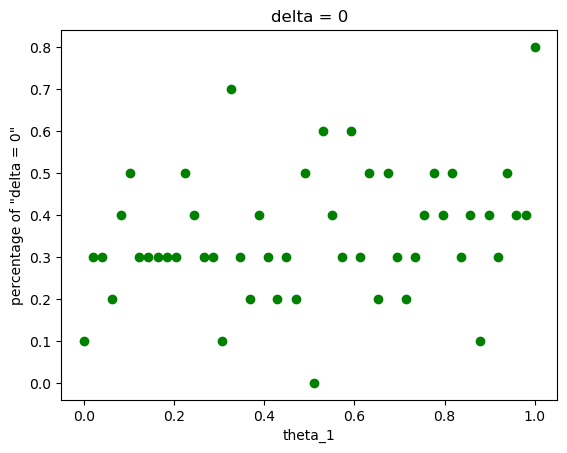

In [108]:
# As theta_1 goes from 0 to 1, plot how "delta=0" changes, and same with "star wins", 
# "branch 1 wins, fraction of 1s on branch 1", etc.

# Converts the count into a percentage
divisor = 10000//100
cnt_1_frac = [x/divisor for x in cnt_1]                       # branch 2 wins
cnt_2_frac = [x/divisor for x in cnt_2]                       # branch 3 wins
cnt_3_frac = [x/divisor for x in cnt_3]                       # branhc 1 wins
cnt_0_frac = [x/divisor for x in cnt_0]                       # delta = 0
cnt_4_frac = [(a - b)/divisor for a, b in zip(cnt_4, cnt_0)]  # star wins

plt.scatter(h1_range, cnt_0_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"delta = 0\"')
plt.title('delta = 0')

plt.show()

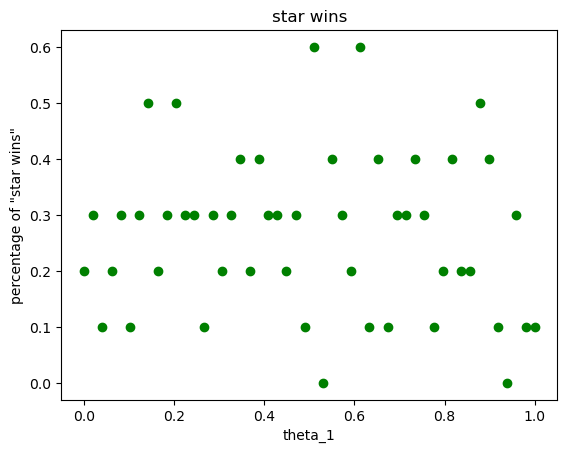

In [109]:
plt.scatter(h1_range, cnt_4_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"star wins\"')
plt.title('star wins')

plt.show()

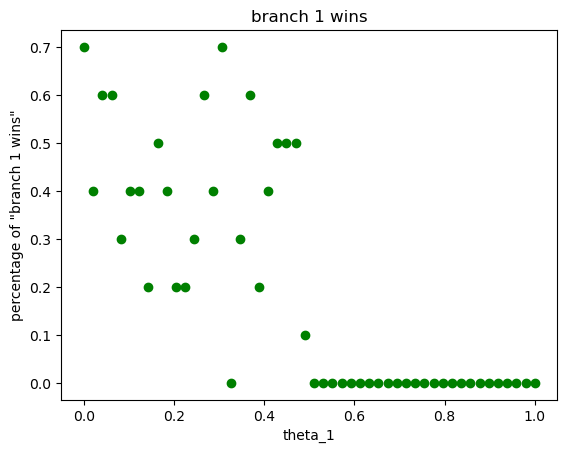

In [110]:
plt.scatter(h1_range, cnt_3_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 1 wins\"')
plt.title('branch 1 wins')

plt.show()

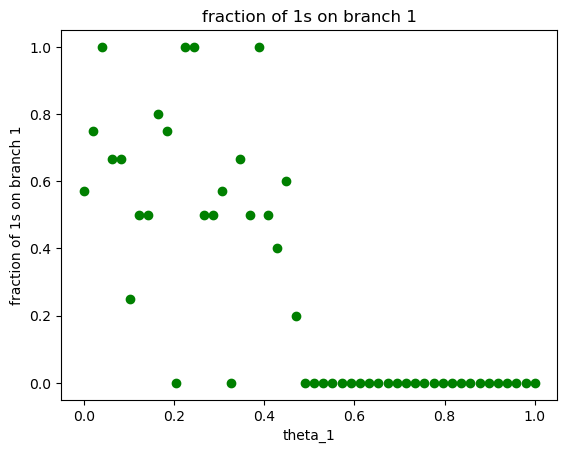

In [111]:
# When a branch wins, what fraction is 1 v. < 1?
cnt_one = [0 for element in range(50)]  
cnt_lt_one = [0 for element in range(50)]  

for u in range(50):
    for i in range(len(theta_1_unique[u])):
        if theta_1_unique[u][i] == 1:
            cnt_one[u] += 1
        else:
            cnt_lt_one[u] += 1

frac_cnt_one = []
for u in range(50):
    if len(theta_1_unique[u]) > 0: # when bracnch 1 wins
        frac_cnt_one.append(cnt_one[u]/len(theta_1_unique[u]))
    elif len(theta_1_unique[u]) == 0:
        frac_cnt_one.append(0) # when branch 1 does not win

plt.scatter(h1_range, frac_cnt_one, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('fraction of 1s on branch 1')
plt.title('fraction of 1s on branch 1')

plt.show()

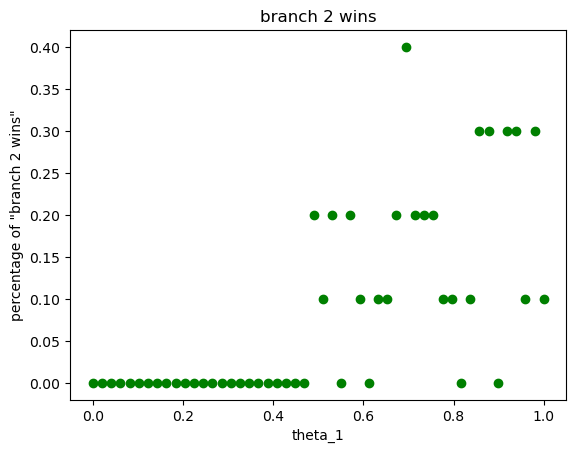

In [112]:
plt.scatter(h1_range, cnt_1_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 2 wins\"')
plt.title('branch 2 wins')

plt.show()

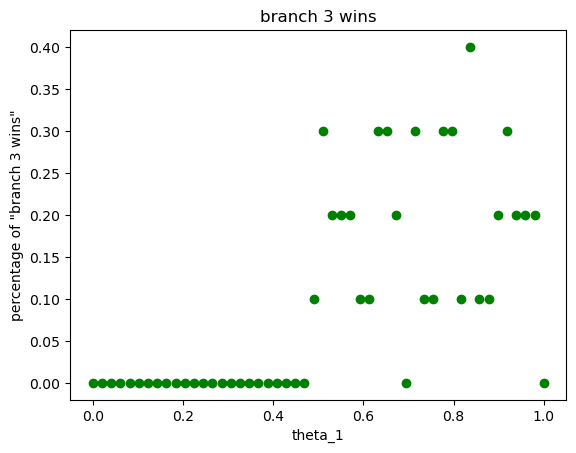

In [114]:
plt.scatter(h1_range, cnt_2_frac, color= "green")
  
plt.xlabel('theta_1')
plt.ylabel('percentage of \"branch 3 wins\"')
plt.title('branch 3 wins')

plt.show()